In [2]:
!pip install beautifulsoup4
!pip install lxml

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

#from bs4 import BeautifulSoup
import os

from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

print('Folium installed')
print('Libraries imported.')

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 122kB 2.8MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.5MB 5.2MB/s eta 0:00:01     |‚ñà‚ñà‚ñâ                             | 481kB 5.2MB/s eta 0:00:01     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                        | 1.3MB 5.2MB/s eta 0:00:01     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 5.1MB 5.2MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0  

In [3]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'QRHCGQZWDOK1VYC2WFOBB1ID4IVNSVIYVLKCNPKRBQ1MP3SB' # your Foursquare ID
CLIENT_SECRET = 'ITVHYKM534BPDGAEMIKMZVODZR4SFGDUN2WCQR5J23AZQEGI' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## NYC DATA

In [5]:
ny_data = get_new_york_data()
ny_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [6]:
ny_data.shape

(306, 4)

## Data Analysis

In [7]:
import matplotlib.pyplot as plt

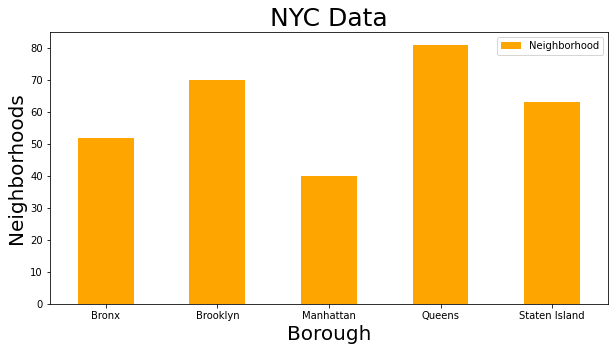

In [8]:
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color="orange")
plt.title('NYC Data', fontsize = 25)
plt.xlabel('Borough', fontsize = 20)
plt.ylabel('Neighborhoods',fontsize = 20)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [9]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mexican_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mexican_restaurants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(ny_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(mexican_restaurants)))
    print(row)
    for resturant_detail in mexican_restaurants.values.tolist():
        id, name , category=resturant_detail
        mexican_rest_ny = mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Mexican Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Mexican Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Mexican Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Mexican Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Mexican Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Mexican Restaurants in Kingsbridge, Bronx:3
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Mexican Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Mexican Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Mexican Restaurants in Norwood, Bronx:1
['

In [10]:
mexican_rest_ny.to_csv('mexican_rest_ny.csv')

mexican_nyc = pd.read_csv('mexican_rest_ny.csv')
mexican_rest_ny.tail()

Borough         Neighborhood                        ID  \
119  Brooklyn                Dumbo  4f69f2b76d86f87117bb13ab   
120  Brooklyn            Homecrest  507e08fae4b0998ce3421276   
121  Brooklyn            Homecrest  4a3ada26f964a5205fa01fe3   
122     Bronx  Kingsbridge Heights  4b403740f964a520e8b625e3   
123     Bronx  Kingsbridge Heights  4e4c9e1318388d49816b44d8   

                                   Name  
119                      Gran El√©ctrica  
120  El Mexicano Restaurante & Cafe Inc  
121       La Villita Mexican Restaurant  
122        Montezuma Mexican Restaurant  
123                          La Catrina

In [11]:
mexican_rest_ny.shape

(124, 4)

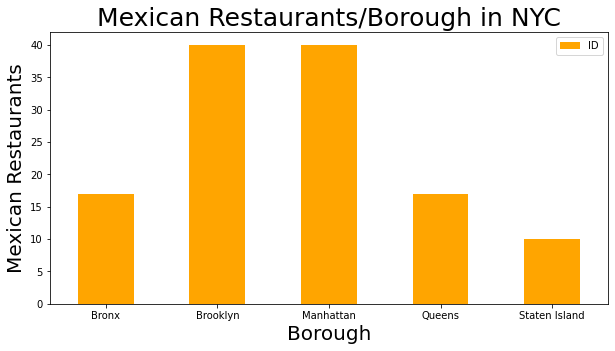

In [12]:
mexican_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color="orange")
plt.title('Mexican Restaurants/Borough in NYC', fontsize = 25)
plt.xlabel('Borough', fontsize = 20)
plt.ylabel('Mexican Restaurants', fontsize=20)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

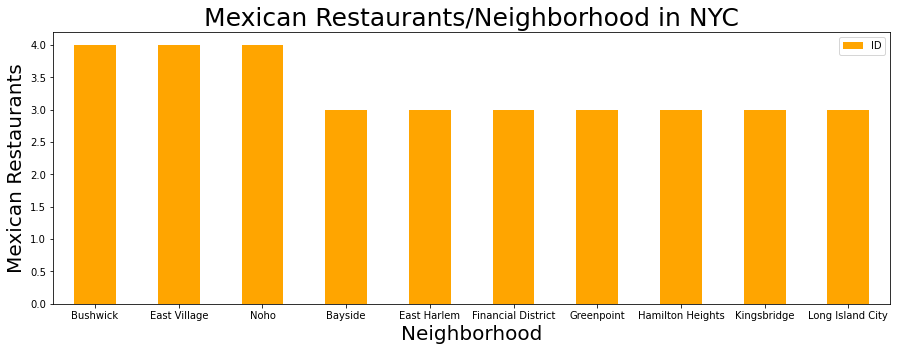

In [13]:
besthoods = 10 # top 10 Neighborhoods
mexican_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(besthoods).plot.bar(figsize=(15,5), color="orange")
plt.title('Mexican Restaurants/Neighborhood in NYC', fontsize = 25)
plt.xlabel('Neighborhood', fontsize = 20)
plt.ylabel('Mexican Restaurants', fontsize=20)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [14]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Bushwick']

Borough Neighborhood                        ID                       Name
27  Brooklyn     Bushwick  507c9d44e4b07390823b8d98             Taqueria Sofia
28  Brooklyn     Bushwick  54a5a765498e6b7e2ce128c8                   El Kucho
29  Brooklyn     Bushwick  4a79c17ef964a52093e71fe3          El Sol de Cholula
30  Brooklyn     Bushwick  4dd6d110814d85e931ff48e4  Zefe's Mexican Restaurant

In [15]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='East Village']

Borough  Neighborhood                        ID  \
67  Manhattan  East Village  5209469f11d2d4f85e5b7427   
68  Manhattan  East Village  49e80026f964a52037651fe3   
69  Manhattan  East Village  4d322023c75a6ea8cc220bae   
70  Manhattan  East Village  544153df498e8f7dae118d8e   

                             Name  
67          Tacos Cuautla Morelos  
68  Zaragoza Mexican Deli-Grocery  
69              El Camion Cantina  
70             Empell√≥n Al Pastor

In [17]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Noho']

Borough Neighborhood                        ID                  Name
105  Manhattan         Noho  518ae551498e2f46f121c613  El Diablito Taqueria
106  Manhattan         Noho  553ac3c8498e6d2422de7741               Rosie's
107  Manhattan         Noho  4bb270a8a32876b0d39900fe       Downtown Bakery
108  Manhattan         Noho  536da20a498e8a08809d145a        Essex Taqueria

In [18]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Bayside']

Borough Neighborhood                        ID             Name
89  Queens      Bayside  4babe1e3f964a520e6d13ae3    Cinco De Mayo
90  Queens      Bayside  4b5a51ddf964a520e7bc28e3  Tequila Sunrise
91  Queens      Bayside  5ba7f851772fbc003913161b    Spanglish NYC

Manhattan & Brooklyn has 40 restaurants, then in tie for third place is Queens with Bronx with more than 15. these are the top 3 Boroughs. 
Bushwick, East Village and Noho are the ones with more restaurants (4) in the neighborhoods, so although Manhattan and Brooklyn are tied with 40 Restaurants each, since Noho & East Village are from Manhattan, Manhattan would be the best Borough for opening a new Mexican Reastaurant. 

In [19]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
mexican_stats_nyc=pd.DataFrame(columns=column_names)
count=1
for row in mexican_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(mexican_rest_ny),')','processed')
    mexican_stats_nyc =  mexican_stats_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
mexican_stats_nyc.tail()

{'meta': {'code': 200, 'requestId': '600da4ce0d13d94ee138eca4'}, 'response': {'venue': {'id': '5217dd2811d2d06ccafb77d3', 'name': 'Estrellita Poblana V', 'contact': {'phone': '7188843825', 'formattedPhone': '(718) 884-3825'}, 'location': {'address': '240 W 231st St', 'lat': 40.879687039717524, 'lng': -73.906256832975, 'labeledLatLngs': [{'label': 'display', 'lat': 40.879687039717524, 'lng': -73.906256832975}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['240 W 231st St', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/estrellita-poblana-v/5217dd2811d2d06ccafb77d3', 'categories': [{'id': '4bf58dd8d48988d1c1941735', 'name': 'Mexican Restaurant', 'pluralName': 'Mexican Restaurants', 'shortName': 'Mexican', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'url': 'http://www.estrel

KeyError: 'venue'

In [20]:
mexican_stats_nyc.to_csv('mexican_stats_ny.csv') 

In [21]:
mexican_stats_nyc.shape

(50, 7)

I only manage to get 50 due to Foursquare limited calls per day.

In [22]:
mexican_stats_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [23]:
mexican_stats_nyc['Likes'] = mexican_stats_nyc['Likes'].astype('float64')
mexican_stats_nyc['Tips'] = mexican_stats_nyc['Tips'].astype('float64')
mexican_stats_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [24]:
mexican_stats_nyc.describe()

Likes     Rating       Tips
count   50.000000  50.000000  50.000000
mean    48.040000   7.174000  19.680000
std     60.432104   1.980086  23.054895
min      0.000000   0.000000   0.000000
25%      9.250000   6.825000   3.000000
50%     24.000000   7.600000   8.000000
75%     54.000000   8.100000  35.250000
max    250.000000   9.100000  88.000000

We are going to look for Restaurants with max likes, max ratings and max tips, this will be limited due to foursquare limitation of data but my analysis will be subjecrted to these 50 ratings.'\

In [26]:
# Restaurant with maximum Likes
mexican_stats_nyc.iloc[mexican_stats_nyc['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                  Greenpoint
ID              5ae8ed8eb3c961002b3360da
Name                             Oxomoco
Likes                                250
Rating                                 9
Tips                                  54
Name: 17, dtype: object

In [27]:
# Restaurant with maximum Ratings
mexican_stats_nyc.iloc[mexican_stats_nyc['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                 Parkchester
ID              4b4929d2f964a520656826e3
Name                   Taqueria Tlaxcali
Likes                                131
Rating                               9.1
Tips                                  73
Name: 7, dtype: object

In [28]:
# Restaurant with maximum Tips
mexican_stats_nyc.iloc[mexican_stats_nyc['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                  South Side
ID              430d0a00f964a5203d271fe3
Name                          Taco Chulo
Likes                                209
Rating                               7.9
Tips                                  88
Name: 46, dtype: object

In [29]:
nyc_nh_stats=mexican_stats_nyc.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
nyc_nh_stats.columns=['Neighborhood','Average Rating']
nyc_nh_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
22         Parkchester        9.100000
5            Chinatown        8.650000
18          North Side        8.400000
28  Westchester Square        8.050000
23    Prospect Heights        8.033333
26          South Side        8.000000
3     Brooklyn Heights        7.950000
4             Bushwick        7.900000
27         Sunset Park        7.850000
15         Kingsbridge        7.833333

In [30]:
nyc_b_stats=mexican_stats_nyc.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
nyc_b_stats.columns=['Borough','Average Rating']
nyc_b_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
2  Manhattan        8.650000
1   Brooklyn        7.364706
0      Bronx        6.500000

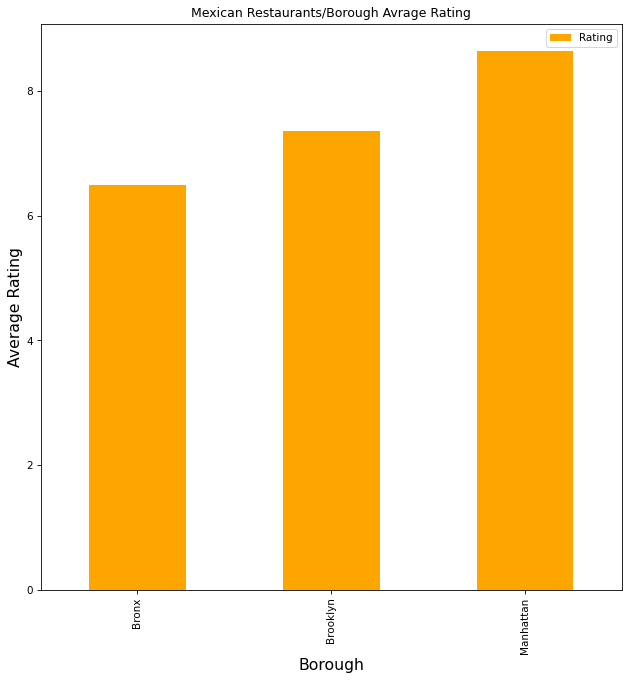

In [52]:
plt.figure(figsize=(10,10), dpi = 75)
plt.title('Mexican Restaurants/Borough Avrage Rating')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
mexican_stats_nyc.groupby('Borough').mean()['Rating'].plot(kind='bar', color='Orange')
plt.legend()
plt.show()

this confirms previous analysis that Manhattan would be the best place for opening a new Mexican Restaurant, & Brooklyn second place based on only these limited ratings. Since we only have 3 Bouroughs we will visualize all in the map.

In [38]:
nyc_nh_stats=nyc_nh_stats[nyc_nh_stats['Average Rating']>=6.0]
nyc_nh_stats

Neighborhood  Average Rating
0             Bay Ridge        6.700000
1          Bedford Park        7.100000
2               Belmont        7.300000
3      Brooklyn Heights        7.950000
4              Bushwick        7.900000
5             Chinatown        8.650000
6          Clinton Hill        7.200000
7              Downtown        7.100000
8     East Williamsburg        6.750000
9              Flatbush        7.400000
10        Fort Hamilton        6.800000
11           Georgetown        7.600000
12           Greenpoint        7.800000
14           Kensington        7.800000
15          Kingsbridge        7.833333
16              Melrose        6.900000
17      North Riverdale        6.500000
18           North Side        8.400000
21           Park Slope        7.650000
22          Parkchester        9.100000
23     Prospect Heights        8.033333
24  Prospect Park South        7.500000
25        Schuylerville        7.200000
26           South Side        8.000000
27          Sunset Park        7.850000
28   Westchester Square        8.050000
29      Windsor Terrace        6.700000

In [39]:
# We'll get lon and lat values
nyc_nh_stats=pd.merge(nyc_nh_stats,ny_data, on='Neighborhood')
nyc_nh_stats=nyc_nh_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
nyc_nh_stats

Borough         Neighborhood   Latitude  Longitude  Average Rating
0    Brooklyn            Bay Ridge  40.625801 -74.030621        6.700000
1       Bronx         Bedford Park  40.870185 -73.885512        7.100000
2       Bronx              Belmont  40.857277 -73.888452        7.300000
3    Brooklyn     Brooklyn Heights  40.695864 -73.993782        7.950000
4    Brooklyn             Bushwick  40.698116 -73.925258        7.900000
5   Manhattan            Chinatown  40.715618 -73.994279        8.650000
6    Brooklyn         Clinton Hill  40.693229 -73.967843        7.200000
7    Brooklyn             Downtown  40.690844 -73.983463        7.100000
8    Brooklyn    East Williamsburg  40.708492 -73.938858        6.750000
9    Brooklyn             Flatbush  40.636326 -73.958401        7.400000
10   Brooklyn        Fort Hamilton  40.614768 -74.031979        6.800000
11   Brooklyn           Georgetown  40.623845 -73.916075        7.600000
12   Brooklyn           Greenpoint  40.730201 -73.954241        7.800000
13   Brooklyn           Kensington  40.642382 -73.980421        7.800000
14      Bronx          Kingsbridge  40.881687 -73.902818        7.833333
15      Bronx              Melrose  40.819754 -73.909422        6.900000
16      Bronx      North Riverdale  40.908543 -73.904531        6.500000
17   Brooklyn           North Side  40.714823 -73.958809        8.400000
18   Brooklyn           Park Slope  40.672321 -73.977050        7.650000
19      Bronx          Parkchester  40.837938 -73.856003        9.100000
20   Brooklyn     Prospect Heights  40.676822 -73.964859        8.033333
21   Brooklyn  Prospect Park South  40.647009 -73.962613        7.500000
22      Bronx        Schuylerville  40.826580 -73.826203        7.200000
23   Brooklyn           South Side  40.710861 -73.958001        8.000000
24   Brooklyn          Sunset Park  40.645103 -74.010316        7.850000
25      Bronx   Westchester Square  40.840619 -73.842194        8.050000
26   Brooklyn      Windsor Terrace  40.656946 -73.980073        6.700000

In [46]:
nyc_map = folium.Map(location=geo_location('New York'), zoom_start=11)
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in nyc_nh_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=8,
            color='black',
            fill=True,
            fill_color='orange',
            fill_opacity=0.8
        )
    )

nyc_nh_stats['Label']=nyc_nh_stats['Neighborhood']+', '+nyc_nh_stats['Borough']+'('+nyc_nh_stats['Average Rating'].map(str)+')'

for lat, lng, label in nyc_nh_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)        

nyc_map.add_child(rating)

Added pop-up text & ratings


## Conclusion

Although Queens has the most neighborhoods Manhattan and Brooklyn managed to have the most Mexican Restaurants with a total of 40 each. Based only on this information we can say that Manhattan and Brooklyn should be our place to open a new restaurant. Doing more research, in tie for third place is Queens & Bronx with more than 15. These Boroughs will be the "top 3" options. As for the neighborhoods we have that Bushwick, East Village and Noho are the ones with more restaurants (4), so although Manhattan and Brooklyn are tied with 40 Restaurants each, since Noho & East Village are from Manhattan, Manhattan would be the best Borough for opening a new Mexican Restaurant based on this information. 

Further analysis leads us that Manhattan has the best Average rating for Mexican restaurants, second place Brooklyn and third place the Bronx, I must note that this last information was limited to only 50 ratings from 306 restaurants, it is a very small sample from the total restaurants but due to Foursquare limited calls these is the most information I can gather with a free account.

With that said, some valuable information that we need to note here is that although Manhattan is always in first place based in these data, the restaurants with the most likes and best tips are the ones from Brooklyn, and as a matter of fact the BEST Mexican restaurant was rated with 9.1 and this restaurant was from the Bronx, who is in third place on average. & that would be the place to have the best Mexican food, the place is called ‚ÄúTaqueria Tlaxcali‚Äù I'm guessing you will have the best tacos in NYC. 

Based only on these data we can conclude that Manhattan should be the best choice for opening a restaurant, further analysis needs to be done in order to get the whole data and make a better decision for the investor.